In [312]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import warnings

warnings.filterwarnings('ignore')

In [313]:
dataset = pd.read_csv("VLagun_Phys_Years3.csv")

In [314]:
dataset.shape

(120, 9)

In [315]:
dataset.head(10)

,PSU,O2,temp.,SS,DOC,TPOC,Windspeedinsitu,Depth,Years
0,3.757624,9.46,18.3,52.0,7.500,8.5650,3.5,3.3,0
1,3.504707,9.89,19.1,50.0,7.860,8.5200,0.0,3.6,0
2,3.757624,9.66,18.1,59.0,8.172,8.4915,1.0,3.4,0
3,3.107266,10.36,19.5,46.0,7.848,8.8320,0.0,2.9,0
4,2.619498,11.56,19.0,42.0,7.536,9.2400,0.0,3.0,0
5,3.269855,9.66,17.6,59.0,7.843,7.9790,5.0,3.2,0
6,2.709825,12.12,19.7,72.0,8.206,8.7176,1.0,1.9,0
7,3.378249,9.42,17.8,58.0,7.139,8.7586,4.0,3.4,0
8,3.721493,9.63,17.5,62.0,7.535,8.4706,4.0,3.2,0
9,4.407982,9.54,18.4,55.0,7.282,8.7020,3.5,3.0,0


1. Okresl nowe X (temp. i Windspeedinsitu), dla których znajdziesz "granicę decyzyjną" dla zbioru Vlagun_Phys_Years3 (2 klasy „Lata”: 0 i 1) (czyli zmienne zależne - Y)

In [316]:
X = dataset.loc[:, ['temp.', 'Windspeedinsitu']].values
y = dataset.loc[:, 'Years'].values

2. Zdefiniuj rozmiar podzbioru testowego na 0,30.

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

3. Wykonaj skalowanie funkcji (wartości nie znajdują się w tym samym zakresie - skalowanie przyspieszy obliczenia)

In [318]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

4. Analiza SVM dla jądra liniowego

In [319]:
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

4.1. Przewiduj wyniki zestawu testowego i treningowego

In [320]:
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

4.2 Skorzystaj z tablicy pomyłek (confusion matrix) – uzyskaj wynik dokładności (accuracy) dla podzbioru testowego i treningowego i zwizualizuj wyniki

In [321]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f'Test accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Training accuracy: {accuracy_score(y_train, y_pred_train)}')

[[20  2]
 [ 1 13]]
Test accuracy: 0.9166666666666666
Training accuracy: 0.7976190476190477


# Model nadmiernie dopasowany
- train i test acc. > 60% 
- test acc. (0.917) > train acc. (0.798)

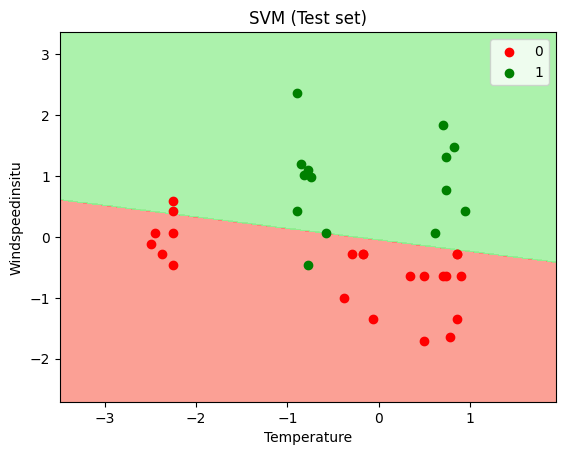

In [322]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop= X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop= X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('salmon', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()

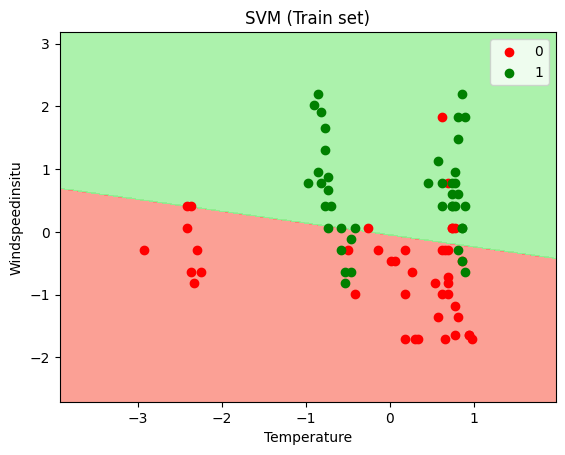

In [323]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop= X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop= X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('salmon', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Train set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()

5. Analiza SVM dla jądra promieniowego

In [324]:
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

5.1. Przewiduj wyniki zestawu testowego i treningowego

In [325]:
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

5.2 Skorzystaj z tablicy pomyłek (confusion matrix) – uzyskaj wynik dokładności (accuracy) dla podzbioru testowego i treningowego i zwizualizuj wyniki

In [326]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f'Test accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Training accuracy: {accuracy_score(y_train, y_pred_train)}')

[[19  3]
 [ 0 14]]
Test accuracy: 0.9166666666666666
Training accuracy: 0.8809523809523809


# Model nadmiernie dopasowany
- train i test acc. > 60% 
- test acc. (0.917) > train acc. (0.881)

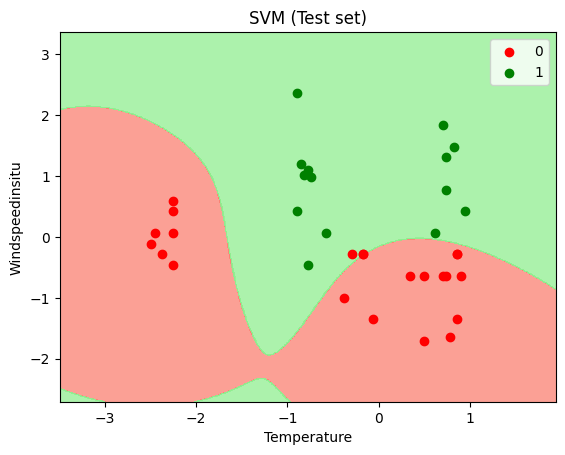

In [327]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop= X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop= X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('salmon', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()

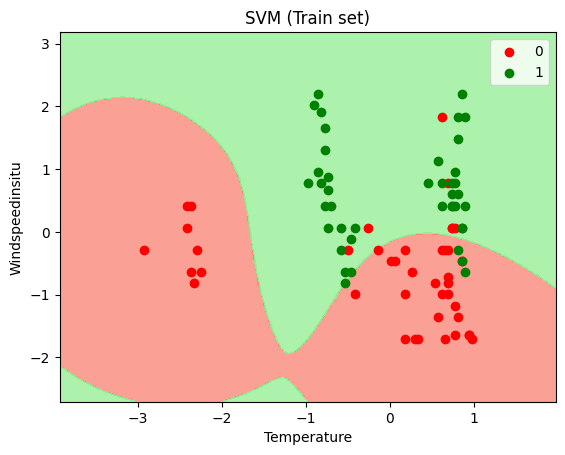

In [328]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop= X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop= X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('salmon', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Train set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()

6. Analiza SVM dla jądra wielomianowego

In [329]:
classifier = SVC(kernel='poly', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

6.1. Przewiduj wyniki zestawu testowego i treningowego

In [330]:
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

6.2 Skorzystaj z tablicy pomyłek (confusion matrix) – uzyskaj wynik dokładności (accuracy) dla podzbioru testowego i treningowego i zwizualizuj wyniki

In [331]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f'Test accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Training accuracy: {accuracy_score(y_train, y_pred_train)}')

[[ 9 13]
 [ 0 14]]
Test accuracy: 0.6388888888888888
Training accuracy: 0.7619047619047619


# Model dopasowany
- train i test acc. > 60% 
- test acc. (0.639) < train acc. (0.762)

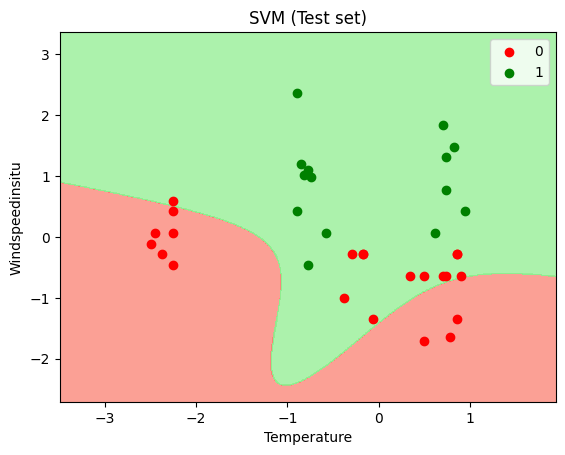

In [332]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop= X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop= X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('salmon', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()

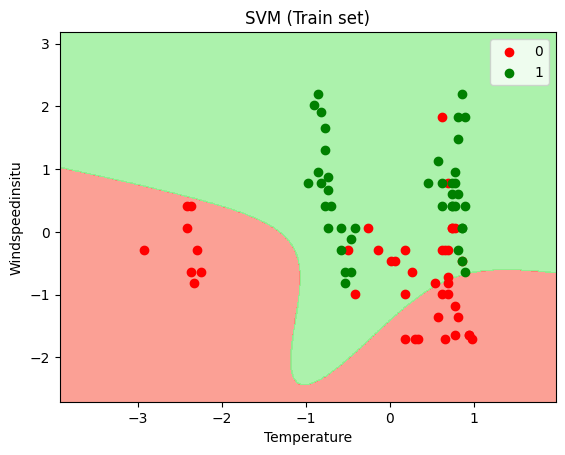

In [333]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop= X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop= X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('salmon', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Train set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()

7. Analiza SVM dla jądra sigmoidalnego

In [334]:
classifier = SVC(kernel='sigmoid', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=0)

7.1. Przewiduj wyniki zestawu testowego i treningowego

In [335]:
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

7.2 Skorzystaj z tablicy pomyłek (confusion matrix) – uzyskaj wynik dokładności (accuracy) dla podzbioru testowego i treningowego i zwizualizuj wyniki

In [336]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f'Test accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Training accuracy: {accuracy_score(y_train, y_pred_train)}')

[[15  7]
 [ 3 11]]
Test accuracy: 0.7222222222222222
Training accuracy: 0.6547619047619048


# Model nadmiernie dopasowany
- train i test acc. > 60% 
- test acc. (0.722) > train acc. (0.655)

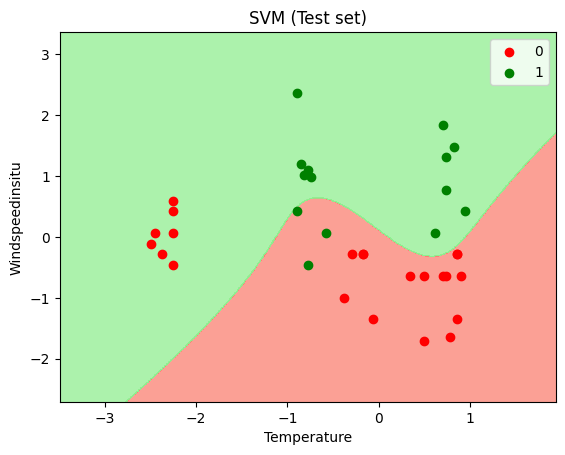

In [337]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop= X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop= X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('salmon', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()

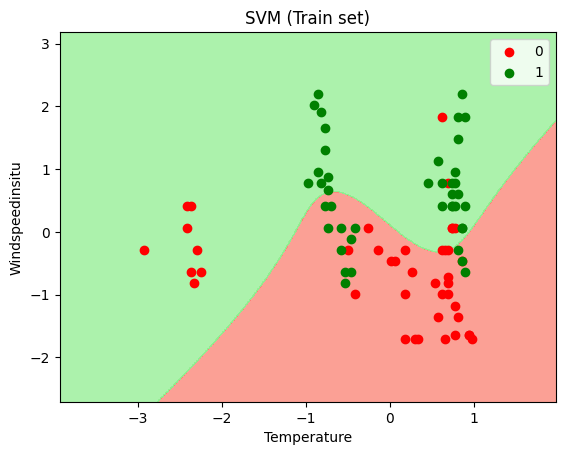

In [338]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop= X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop= X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('salmon', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Train set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeedinsitu')
plt.legend()
plt.show()

Jądro z najwyższym wskaźnikiem dokładności (accuracy) dla tego zestawu danych to promieniowe (rbf).

Natomiast jądro wielomianowe (poly) jako jedyne osiągneło poprawne dopasowanie modelu, pozostałe były nadmiernie dopasowane.